In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.filename)

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv


In [7]:
import pandas as pd

In [8]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data['PRICE'] = boston.target

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [14]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [17]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.6140,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.4930,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


In [20]:
y_train

203    48.5
441    17.1
172    23.1
95     28.4
54     18.9
       ... 
98     43.8
476    16.7
322    20.4
382    11.3
365    27.5
Name: PRICE, Length: 404, dtype: float64

In [21]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
85,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44178,0.0,6.20,0.0,0.5040,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
159,1.42502,0.0,19.58,0.0,0.8710,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
196,0.04011,80.0,1.52,0.0,0.4040,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08
345,0.03113,0.0,4.39,0.0,0.4420,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53


In [22]:
y_test

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
       ... 
229    31.5
159    23.3
196    33.3
345    17.5
467    19.1
Name: PRICE, Length: 102, dtype: float64

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [24]:
xg_reg.fit(X_train,y_train)

[10:14:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
preds = xg_reg.predict(X_test)

In [26]:
preds

array([ 9.107417 , 17.003168 , 23.554592 , 11.127839 , 18.847708 ,
       14.83594  , 17.920063 ,  7.8613553, 12.147531 , 18.064953 ,
       18.074614 , 14.411147 , 11.660895 , 15.656607 , 14.011221 ,
       14.031893 , 14.247164 , 23.057888 , 13.79595  , 11.450888 ,
       12.218057 , 15.310874 , 20.628437 , 23.554592 , 15.16144  ,
       13.139177 , 11.691522 , 15.382896 , 15.382896 , 11.007488 ,
       14.734173 , 18.862646 ,  8.471523 , 15.349405 , 15.463427 ,
       19.77869  , 15.875313 ,  9.95701  , 12.919248 , 23.60624  ,
       18.295853 , 12.589657 , 14.179869 , 21.97658  , 12.664099 ,
       16.489174 , 14.038502 , 15.660043 , 12.919248 , 14.453838 ,
       18.862646 , 17.252022 , 14.038502 ,  7.9073224, 14.332668 ,
       10.871179 , 10.826269 ,  8.5319   , 19.534363 ,  8.196141 ,
       12.403829 , 14.235118 , 10.42806  , 13.162136 , 14.247164 ,
       15.931118 , 16.565668 ,  9.804545 , 14.915205 , 18.295853 ,
       13.15519  , 15.318869 , 12.919248 , 16.430174 , 11.8543

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


In [28]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [29]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[10:14:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:14:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:14:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680257,0.025607,21.719121,0.019025
1,19.740498,0.072069,19.818879,0.061769
2,18.007202,0.119745,18.109862,0.129375
3,16.463925,0.115087,16.587235,0.182338
4,14.990313,0.112001,15.132977,0.166282


In [31]:
cv_results.shape

(50, 4)

In [32]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


In [33]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[10:14:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


Note that the size of the 2 figures below was not appearing properly.  
After looking online, I found that you have to put 
"plt.rcParams['figure.figsize'] = ..." before defining the actual plot.

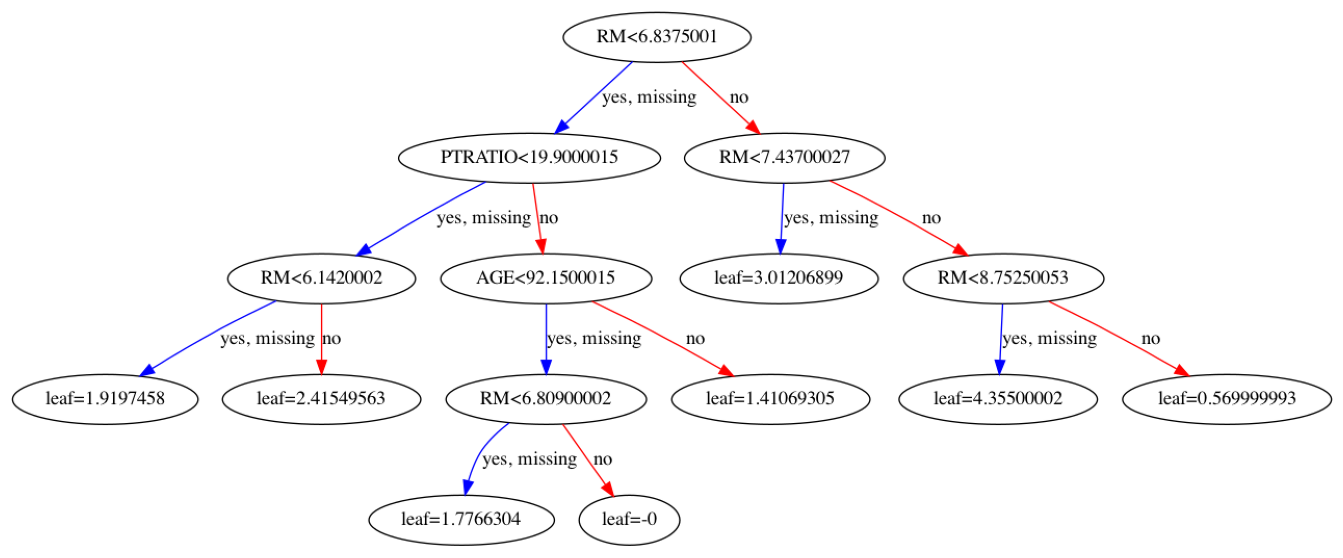

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 10]
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

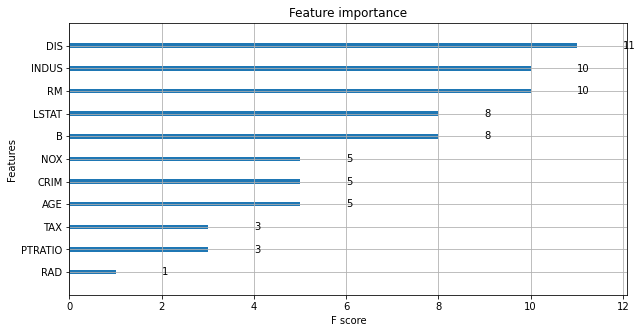

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
xgb.plot_importance(xg_reg)
plt.show()

# The following is extra.

I just want to compare the results to a decision tree grown without restrictions on maximum depth.

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree = DecisionTreeRegressor()

In [38]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
tree.get_depth()

19

In [40]:
y_tree = tree.predict(X_test)

In [41]:
y_tree

array([50. , 31.1, 50. , 21.9, 31.6, 38.7, 20.7,  8.8, 23.1, 28.7, 24.7,
       19.5, 13.6, 23.4, 17.5, 22.6, 21.8, 43.5, 17.8, 19.1, 14.3, 50. ,
       23.6, 46.7, 50. , 24.4, 13.5, 19.5, 17.1, 23.8, 30.1, 33.1, 11.7,
       21. , 28.1, 36. , 22.9, 17.1, 15.2, 48.3, 28. , 16. , 50. , 41.7,
       27.1, 21.9, 21. , 23.1, 18.1, 50. , 29.1, 36.2, 20.4, 11.3, 23.8,
       16.1, 13.8, 10.5, 31.5,  8.5, 19.8, 22. , 23.2, 21.9, 15.3, 23.2,
       22.9, 23.2, 21.7, 29.1, 20.1, 25. , 18.4, 24.8, 18.7, 10.2, 13.1,
       16. , 29.1, 13.1, 34.7,  8.3, 25. , 22.5, 23.1, 24.6, 17.1, 23.4,
       20.4, 29.1, 16.7, 36.4, 18.8, 24.7, 37.3, 29.1, 14.1, 29.1, 25. ,
       31.5, 17.2, 12.7])

In [42]:
rmse_tree = np.sqrt(mean_squared_error(y_test, y_tree))
print("RMSE_tree: %f" % (rmse_tree))

RMSE_tree: 6.943907
